In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, iirnotch
from tqdm import tqdm

# **Ploteo de Señales**

Señal 1 en reposo EMG: [509. 508. 507. ... 510. 509. 510.]
Señal 2 fuerza oponente - Contracción Leve: [512. 510. 508. ... 510. 508. 512.]
Señal 3 levantando mochila - Contracción Fuerte: [509. 507. 508. ... 508. 508. 510.]


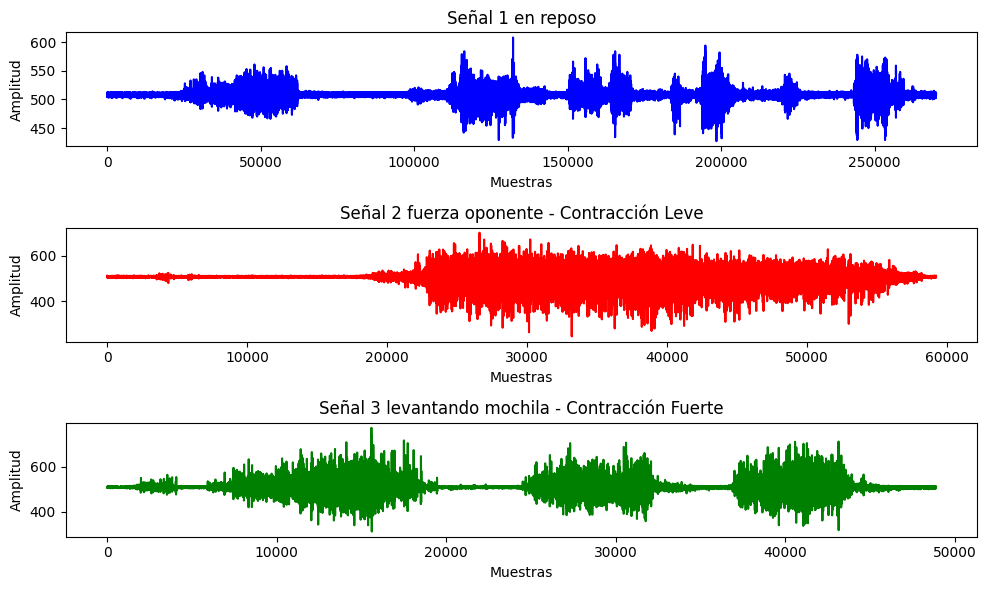

In [ ]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt('/content/Reposo_EMG.txt')
array2= np.genfromtxt('/content/Levantando_Mochila_EMG.txt')
array3= np.genfromtxt('/content/Fuerza_oponente_EMG.txt')

array1 = array1[:,5]
print("Señal 1 en reposo EMG:",array1)
array2 = array2[:,5]
print("Señal 2 fuerza oponente - Contracción Leve:",array2)
array3= array3[:,5]
print("Señal 3 levantando mochila - Contracción Fuerte:",array3)

plt.figure(figsize=(10, 6))

# Gráfico de la señal 1
plt.subplot(311)
plt.plot(array1, color='blue')
plt.title('Señal 1 en reposo')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 2
plt.subplot(312)
plt.plot(array2, color='red')
plt.title('Señal 2 fuerza oponente - Contracción Leve')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 3
plt.subplot(313)
plt.plot(array3, color='green')
plt.title('Señal 3 levantando mochila - Contracción Fuerte')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

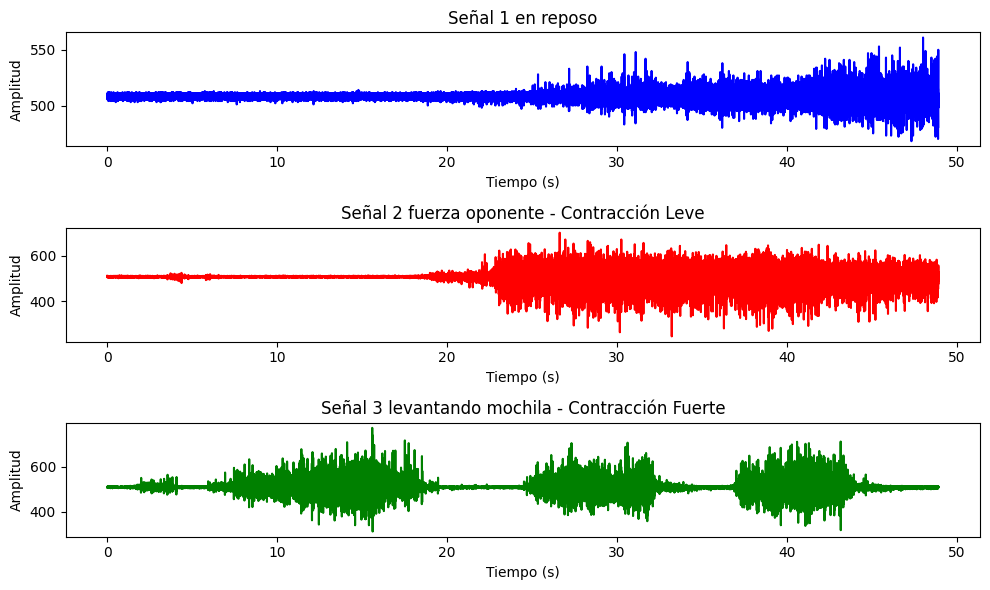

In [ ]:
Fs=1000
M = min(len(array1), len(array2), len(array3))
array1 = array1[:M]
array2 = array2[:M]
array3 = array3[:M]

# Vector de tiempo en segundos
t = np.arange(0, M) / Fs

# Crear figuras y subgráficos
plt.figure(figsize=(10, 6))

# Gráfico de la señal 1
plt.subplot(311)
plt.plot(t, array1, color='blue')
plt.title('Señal 1 en reposo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico de la señal 2
plt.subplot(312)
plt.plot(t, array2, color='red')
plt.title('Señal 2 fuerza oponente - Contracción Leve')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico de la señal 3
plt.subplot(313)
plt.plot(t, array3, color='green')
plt.title('Señal 3 levantando mochila - Contracción Fuerte')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

# **# FFT DE N puntos**

Text(0.5, 1.0, ' Análisis en frecuencia En reposo1')

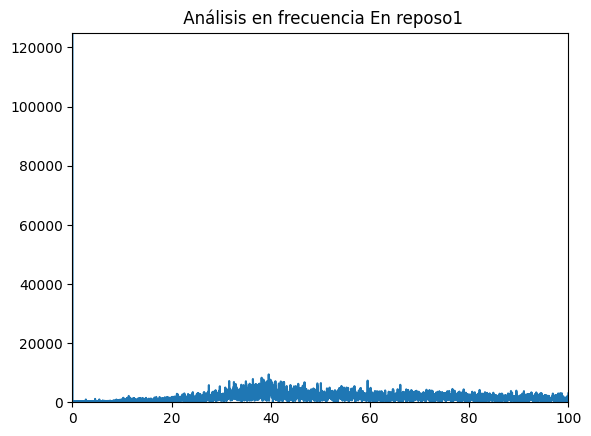

In [ ]:

# Transformada de Fourier
#transformada de fourier FFT
N1 = len(array1)
N2= len(array2)
N3=len(array3)
n = np.arange(0,M)

D1 = np.fft.fft(array1,N1)
D2 = np.fft.fft(array2,N2)
D3 = np.fft.fft(array3,N3)

D1 = D1[0:(N1//2)]
D2 = D2[0:(N2//2)]
D3 = D3[0:(N3//2)]

#magnitud para las tres señales en la frecuencia
D1m = np.abs(D1)
D1m = np.round(D1m,3)

D2m = np.abs(D2)
D2m = np.round(D2m,3)

D3m = np.abs(D3)
D3m = np.round(D3m,3)


#frecuencias
F = np.linspace(0, Fs/2, N1//2)

#eje de tiempo en seg
t = n/Fs #Para todos es el mismo tiempo por haber delimitado las señales

plt.plot(F,D1m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo1")

Text(0.5, 1.0, ' Análisis en frecuencia de Hiperventilacion')

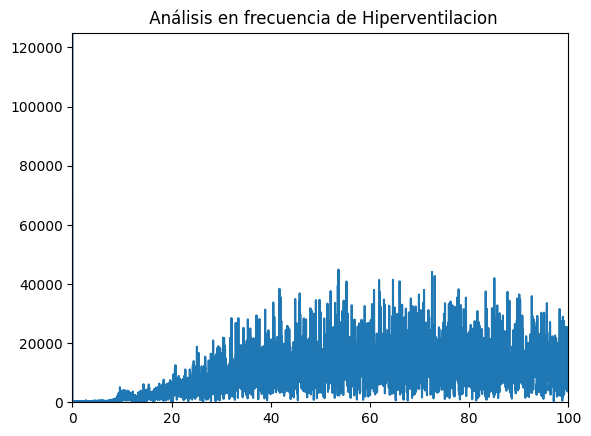

In [ ]:
plt.plot(F,D2m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de Hiperventilacion")

Text(0.5, 1.0, ' Análisis en frecuencia de Hiperventilacion')

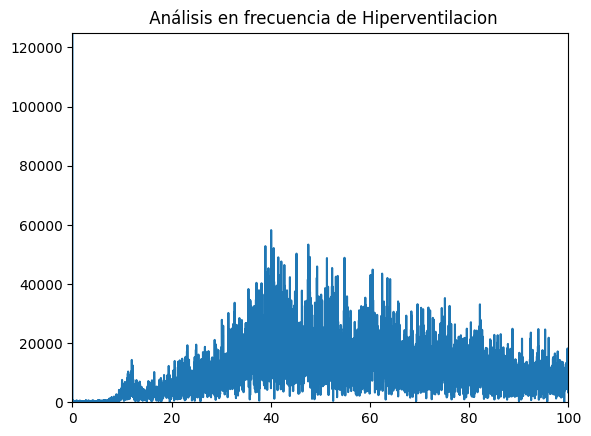

In [ ]:
plt.plot(F,D3m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de Hiperventilacion")

# **Diseño de filtro FIR - Hamming**

Text(0.5, 1.0, 'Filtro Hamming para la realización del corte en frecuencias altas')

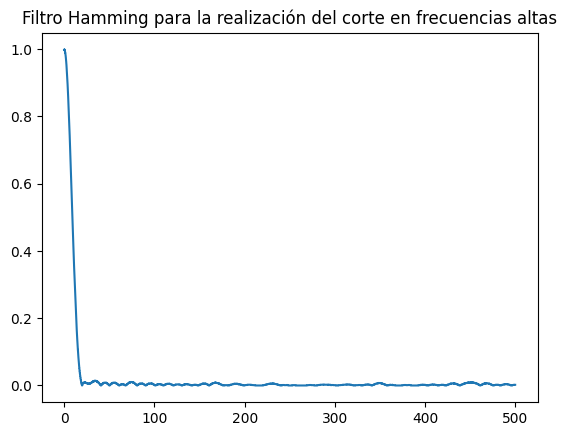

In [ ]:
#longitud de la ventana
M = 101
#frecuencia de corte en Hz
Fc = 0.05

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/Fs
Fs=1000

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=Fs)
w = np.round(w,3)

nm = np.arange(M)
W = np.fft.fft(w,N1)
W = np.round(W[0:N1//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N1//2])
Ry = np.linspace(0,1,N1//2)

Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.figure()
plt.plot(F,Wm)
plt.title("Filtro Hamming para la realización del corte en frecuencias altas")

# **Aplicación del filtro FIR - Hamming**

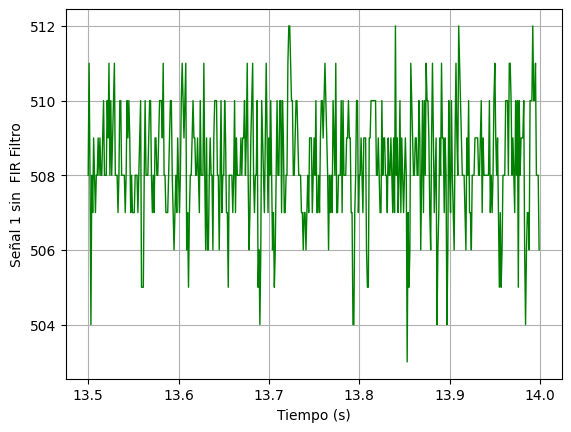

In [ ]:
#Aplicacion de los filtros con la señal original en el tiempo para realizar la convolución de las señales
y1 = lfilter(w, 1.0,array1)
y2 = lfilter(w, 1.0,array2)
y3 = lfilter(w,1.0,array3)

tiempo = np.arange(len(array1)) / Fs
# Define el intervalo de tiempo que deseas visualizar (segundos)
inicio_segundo = 13.5
fin_segundo = 14
inicio_muestra = int(inicio_segundo * Fs)
fin_muestra = int(fin_segundo *Fs)

plt.plot(tiempo[inicio_muestra:fin_muestra], array1[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Señal 1 sin  FIR Filtro')
plt.grid(True)




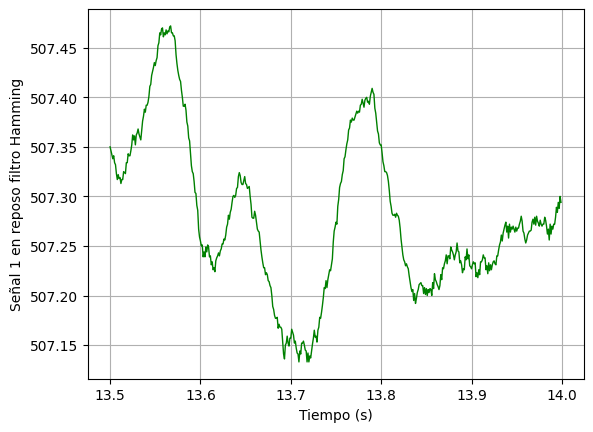

In [ ]:
plt.plot(tiempo[inicio_muestra:fin_muestra], y1[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Señal 1 en reposo filtro Hamming')
plt.grid(True)

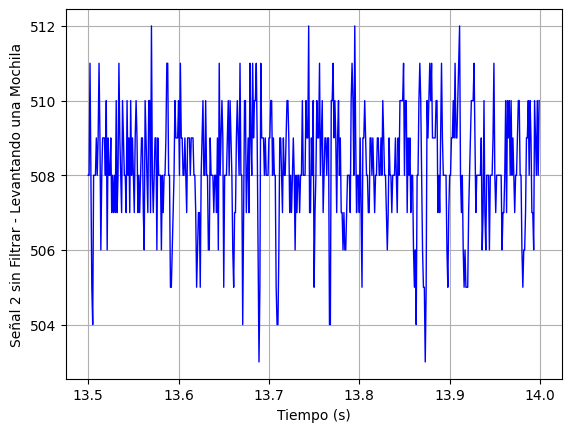

In [ ]:
plt.plot(tiempo[inicio_muestra:fin_muestra], array2[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Señal 2 sin Filtrar - Levantando una Mochila')
plt.grid(True)

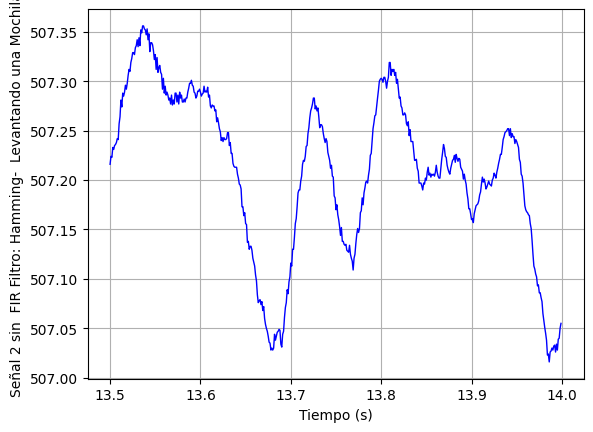

In [ ]:
plt.plot(tiempo[inicio_muestra:fin_muestra], y2[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Señal 2 sin  FIR Filtro: Hamming-  Levantando una Mochila')
plt.grid(True)

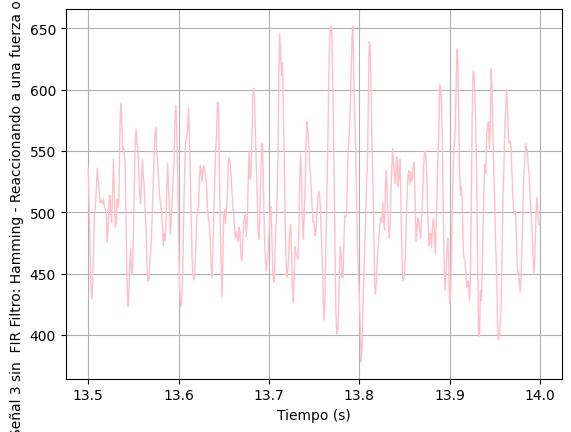

In [ ]:
plt.plot(tiempo[inicio_muestra:fin_muestra], array3[inicio_muestra:fin_muestra], lw=1, color='pink')
plt.xlabel('Tiempo (s)')
plt.ylabel('Señal 3 sin  FIR Filtro: Hamming - Reaccionando a una fuerza opuesta')
plt.grid(True)

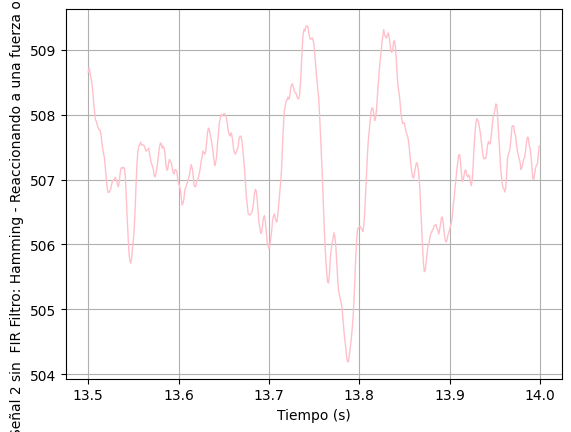

In [ ]:
plt.plot(tiempo[inicio_muestra:fin_muestra], y3[inicio_muestra:fin_muestra], lw=1, color='pink')
plt.xlabel('Tiempo (s)')
plt.ylabel('Señal 2 sin  FIR Filtro: Hamming - Reaccionando a una fuerza opuesta')
plt.grid(True)